In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

9


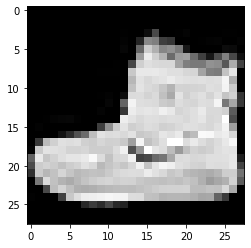

In [4]:
plt.imshow(train_x[0], cmap='gray')
print(train_y[0])

In [5]:
train_x, test_x = train_x / 255.0, test_x / 255.0

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation=tf.nn.relu),
    keras.layers.Dense(units=10, activation=tf.nn.softmax),
])

Metal device set to: Apple M1 Pro


2022-03-16 10:48:19.305213: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-16 10:48:19.305387: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(train_x, train_y, epochs=3)

Epoch 1/3


2022-03-16 10:48:19.588327: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-16 10:48:19.781637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.4271 - accuracy: 0.8450
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2885 - accuracy: 0.8948
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2404 - accuracy: 0.9110


In [9]:
model.evaluate(test_x, test_y)

 19/313 [>.............................] - ETA: 1s - loss: 0.2860 - accuracy: 0.9128

2022-03-16 10:49:16.049099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.2926 - accuracy: 0.8956


[0.2926049828529358, 0.8956000208854675]

In [10]:
result = [np.argmax(x) for x in model.predict(test_x)]
comparison = result == test_y

2022-03-16 10:49:17.821849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
trues = np.count_nonzero(comparison)
falses = len(comparison) - trues
print(f"Trues: {trues} and Falses: {falses}")
print(f"Accuracy: {trues/(trues+falses)}")

Trues: 8956 and Falses: 1044
Accuracy: 0.8956


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2